In [ ]:
## Supervised learning
- [ ] One project for each of the different regression types
- [ ] Classification
- [ ] Tagging: multi-label classfication
- [ ] Search and recommendations
- [ ] Sequence learning

In [2]:
# Application of sequence learning
# 1. Natural Language Processing (NLP): For tasks like machine translation, speech recognition, text generation, and sentiment analysis.
# 2. Time Series Forecasting: Such as predicting stock prices, weather forecasts, or sales forecasting.
# 3. Biology: Like predicting protein structures based on amino acid sequences.

In [7]:
# Simple Binary Classification: Logistic Regression
# Here's what we will do:
# 1. Create and scatter a bunch of red and blue balls (no overlap)
# 2. Show some of these balls to Logistic Regression Model
# 3. The model learns the pattern and draws a line separating two groups
# 4. Test the model new balls(test set:- unseen) and see how well it does

In [20]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris

# 1. Create red and blue balls; load data
data = load_iris()
X = data.data[:, :2]  # Use only the first two features
y = (data.target != 0) * 1  # Convert to binary classification (class 0 vs not class 0)

print(X.shape, y.shape)
X[:5], y[:5]

(150, 2) (150,)


(array([[5.1, 3.5],
        [4.9, 3. ],
        [4.7, 3.2],
        [4.6, 3.1],
        [5. , 3.6]]),
 array([0, 0, 0, 0, 0]))

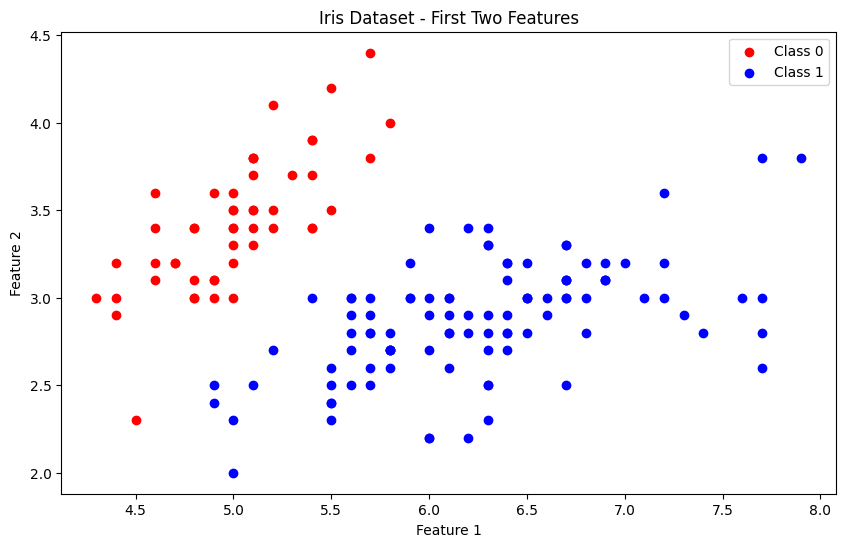

In [21]:
# Let's see how the balls are scattered visually
plt.figure(figsize=(10, 6))
plt.scatter(X[y == 0][:, 0], X[y == 0][:, 1], color='red', label='Class 0')
plt.scatter(X[y == 1][:, 0], X[y == 1][:, 1], color='blue', label='Class 1')
plt.title('Iris Dataset - First Two Features')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.show()

# X - contains the coordinates(x,y) of each ball 
# y - tells whether the ball is red or blue || [0, 1]

In [22]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

# Splitting the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Creating the Logistic Regression model
model = LogisticRegression(solver='liblinear', random_state=0)
model.fit(X_train, y_train) # the model learns the pattern

# Making predictions on the test set
predictions = model.predict(X_test)


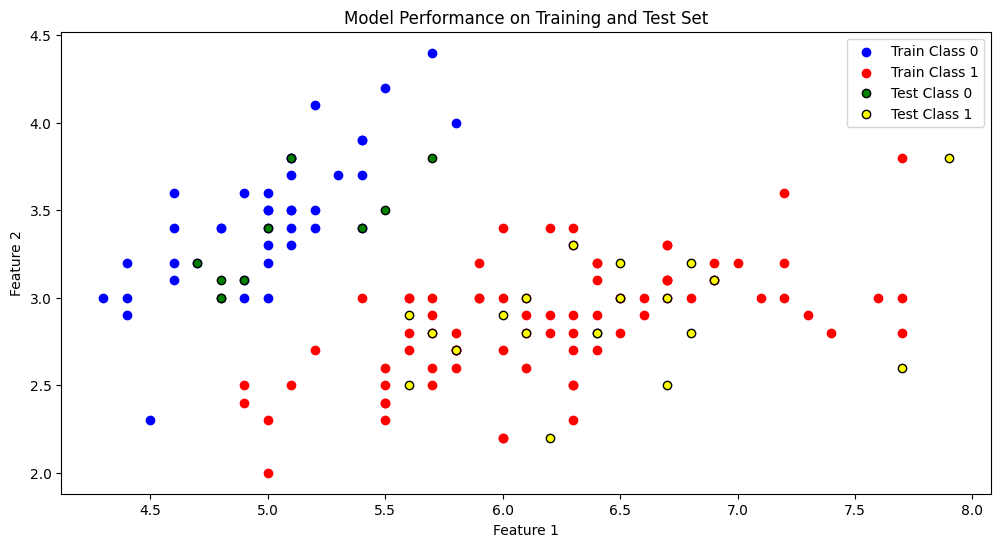

In [19]:
# let's see the model performance on unseen data
# Now we plot
plt.figure(figsize=(12, 6))

# Plot training data in blue and red
plt.scatter(X_train[y_train == 0][:, 0], X_train[y_train == 0][:, 1], color='blue', label='Train Class 0')
plt.scatter(X_train[y_train == 1][:, 0], X_train[y_train == 1][:, 1], color='red', label='Train Class 1')

# Plot test data in green and yellow
plt.scatter(X_test[y_test == 0][:, 0], X_test[y_test == 0][:, 1], color='green', label='Test Class 0', edgecolor='k')
plt.scatter(X_test[y_test == 1][:, 0], X_test[y_test == 1][:, 1], color='yellow', label='Test Class 1', edgecolor='k')

# Label the axes and add a legend
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Model Performance on Training and Test Set')
plt.legend()
plt.show()


In [23]:
# Behind the scenes of Logistic Regression Model: THE ESSENCE 
# GOAL: to make a model and teach it draw a line separating blue and red balls

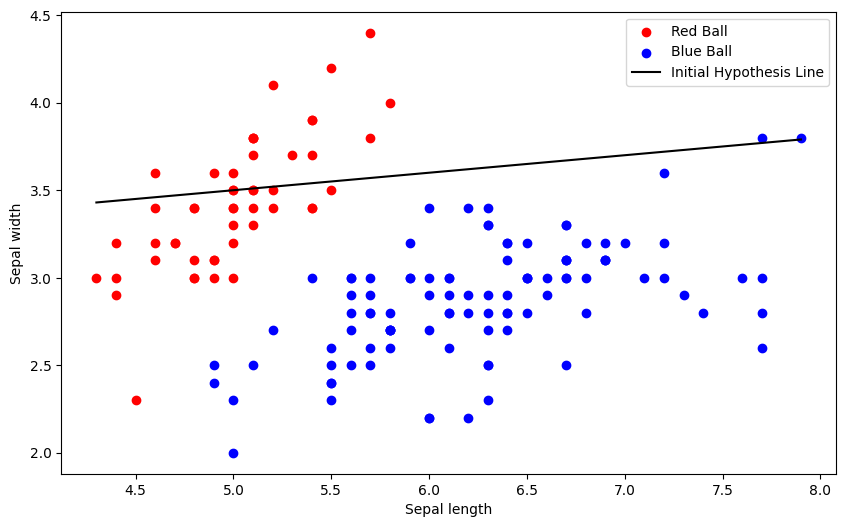

array([4.3, 7.9])

In [36]:
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt

# Load Iris dataset
iris = load_iris()
X = iris.data[:, :2]  # We only take the first two features.
y = (iris.target != 0) * 1  # Convert to binary classification problem: Not-Setosa (1) vs Setosa (0).

# Plot the features
plt.figure(figsize=(10, 6))
plt.scatter(X[y == 0][:, 0], X[y == 0][:, 1], color='red', label='Red Ball')
plt.scatter(X[y == 1][:, 0], X[y == 1][:, 1], color='blue', label='Blue Ball')

# Define and plot the hypothetical decision boundary (line)
# We draw a random line on the graph: initialize parameters m,b
m, b = 0.1, 3 
x_values = np.array([min(X[:, 0]), max(X[:, 0])])  # array([4.3, 7.9])
y_values = m * x_values + b
plt.plot(x_values, y_values, label='Initial Hypothesis Line', color='black')

plt.xlabel('Sepal length')
plt.ylabel('Sepal width')
plt.legend()
plt.show()

x_values

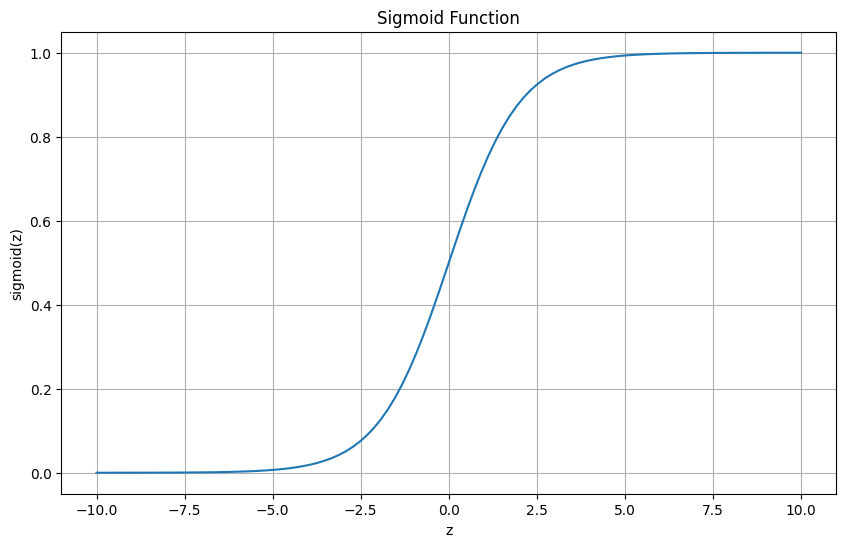

In [37]:
import numpy as np
import matplotlib.pyplot as plt

# Sigmoid function
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

# Generate a range of values from -10 to 10 to represent linear combinations
z = np.linspace(-10, 10, 100)

# Calculate the sigmoid of these values
p = sigmoid(z)

# Plot
plt.figure(figsize=(10, 6))
plt.plot(z, p)
plt.title('Sigmoid Function')
plt.xlabel('z')
plt.ylabel('sigmoid(z)')
plt.grid(True)
plt.show()


In [40]:
# We need to find the best combination of m & b 
# to draw a line that separates red and blue balls
# i.e. give the model, the coordinates(X) of a random ball, and 
# it should be able to tell whether the ball is red or blue

# predict y for given X, m, b

Z = np.dot(X, m) + b     # Z = mx + b

X[:5], Z[:5]

(array([[5.1, 3.5],
        [4.9, 3. ],
        [4.7, 3.2],
        [4.6, 3.1],
        [5. , 3.6]]),
 array([[3.51, 3.35],
        [3.49, 3.3 ],
        [3.47, 3.32],
        [3.46, 3.31],
        [3.5 , 3.36]]))

In [41]:
# apply sigmoid function converting Z to value between 0 and 1
P = 1/ (1 + np.exp(-Z))
P[:5]

array([[0.97097096, 0.96610484],
       [0.9704019 , 0.96442881],
       [0.96982202, 0.96510859],
       [0.96952797, 0.96477028],
       [0.97068777, 0.96643078]])

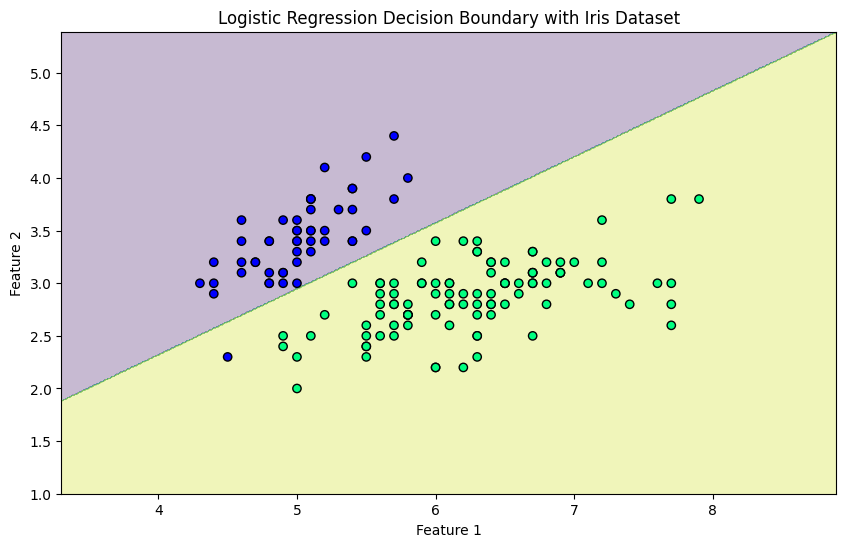

In [2]:
from sklearn.linear_model import LogisticRegression
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

# Load and prepare dataset
data = load_iris()
X = data.data[:, :2]
y = (data.target != 0) * 1

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the logistic regression model
model = LogisticRegression(solver='liblinear', random_state=0)
model.fit(X_train, y_train)

# Create a mesh to plot the decision boundary
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))

# Predict for every point in the mesh
Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot
plt.figure(figsize=(10, 6))
plt.contourf(xx, yy, Z, alpha=0.3)
plt.scatter(X[:, 0], X[:, 1], c=y, edgecolor='k', cmap='winter')
plt.title('Logistic Regression Decision Boundary with Iris Dataset')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()


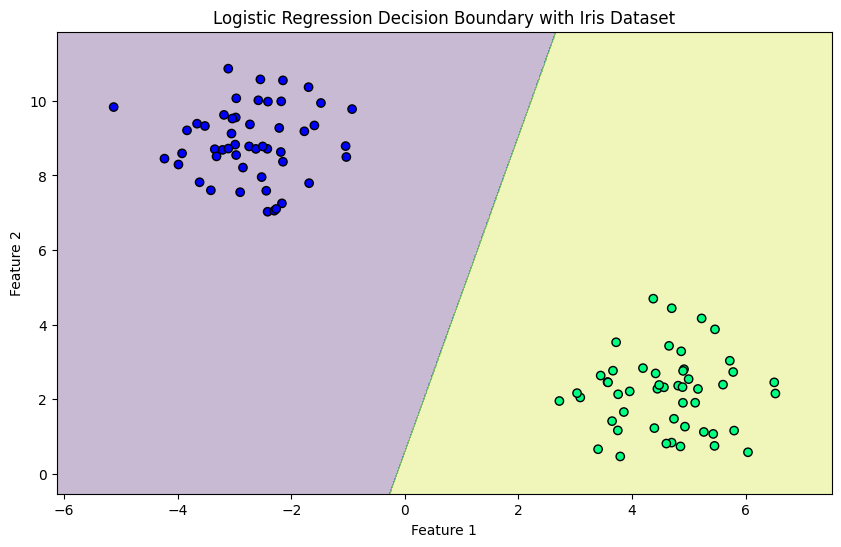